In [52]:
import scipy.io.wavfile, scipy.signal, sounddevice
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter
from timeit import default_timer as timer
import pandas as pd
from datetime import datetime
import random
import math

plt.rcParams["figure.dpi"] = 120

[]

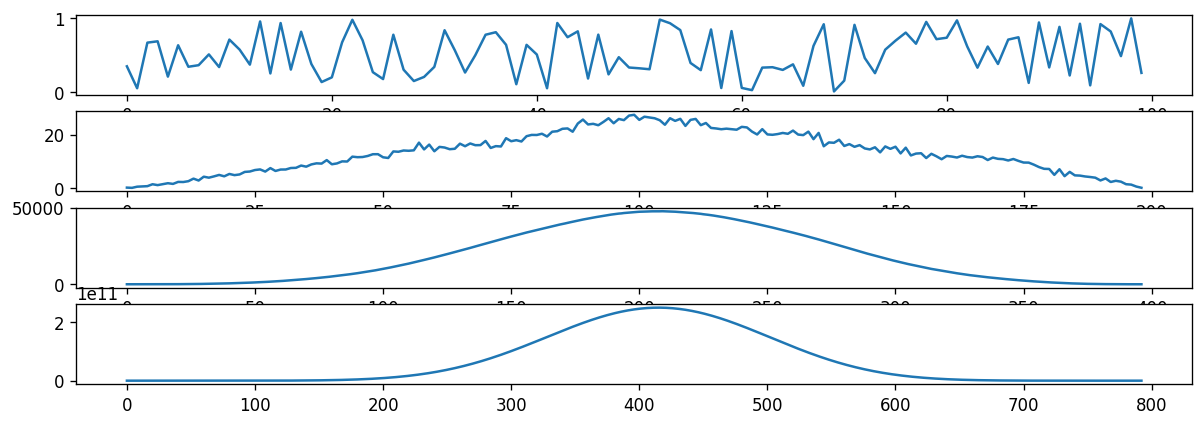

In [53]:
# 1

N = 100
x = np.random.rand(N)

fig, axs = plt.subplots(4, 1, figsize=(12, 4))
for ax in axs:
    ax.plot(x)
    x = np.convolve(x, x)


plt.plot()